In [1]:
import pm4py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

## **Question 3: Process Discovery**

### Part (a.i)
In this part, we are applying the different process discovery models.

In [2]:
ingredient_prep_B_log = pm4py.read_xes(os.path.join("data", "input-logs", "ingredient_prep_B.xes"))

D:\Projects\apm-assignment-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|█████████████████████████████████████████████| 314/314 [00:00<00:00, 2048.04it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] =

In [3]:
def analyze_model(log, net, im, fm, activity_key='concept:name', soundness_check=True, calc_f1_score=False):
    fitness = 0
    precision = 0
    try:
        fitness = pm4py.fitness_alignments(log, net, im, fm, activity_key=activity_key)
        fitness = fitness['log_fitness']
        print(f"Fitness Alignments: {fitness}")
    except Exception as ex:
        print("Could not compute fitness due to unsoundness of the model!")
    try:
        precision = pm4py.precision_alignments(log, net, im, fm, activity_key=activity_key)
        print(f"Precision Alignments: {precision}")
    except Exception as ex:
        print("Could not compute precision due to unsoundness of the model!")
    # Check if the model is sound

    if soundness_check:
        soundness_result = pm4py.check_soundness(net, im, fm)
        if soundness_result[0]:
            print("Model is sound.")
        else:
            print("Model is not sound!")
    f1_score = 0.0
    if calc_f1_score:
        recall = fitness
        f1_score = (2 * precision * recall) / (precision + recall)
        print(f"F1-Score: {f1_score}")
    return round(fitness, 2), round(precision, 2), round(f1_score, 2)

def discover_and_analyze_model(log, algorithm, activity_key='concept:name', noise_threshold=0.0, soundness_check=True, calc_f1_score=False, save_img=False, filename='default.png', format='png'):
    methods = {
        'alpha': pm4py.discover_petri_net_alpha,
        'heuristics': pm4py.discover_petri_net_heuristics,
        'inductive': pm4py.discover_petri_net_inductive,
        'ilp': pm4py.discover_petri_net_ilp   
    }
    if algorithm not in methods:
        return
    # Get the corresponding process discovery method based on the specified algorithm
    process_discovery_handler = methods[algorithm]
    # Process discovery using the specified algorithm
    if algorithm == 'inductive':
        net, im, fm = process_discovery_handler(log, activity_key=activity_key, noise_threshold=noise_threshold)
    else:
        net, im, fm = process_discovery_handler(log, activity_key=activity_key)
    # Calculate fitness and precision using the alignments method for the model discovered by the specified algorithm
    fitness, precision, f1_score = analyze_model(log, net, im, fm, activity_key=activity_key, soundness_check=soundness_check, calc_f1_score=calc_f1_score)
    # View the model discovered by the specified algorithm
    pm4py.view_petri_net(net, im, fm, format='png')
    if save_img:
        pm4py.save_vis_petri_net(net, im, fm, file_path=os.path.join('./output_imgs', filename))
    return fitness, precision, f1_score

Could not compute fitness due to unsoundness of the model!
Could not compute precision due to unsoundness of the model!
Input is ok.
There is more than one sink place.
Model is not sound!


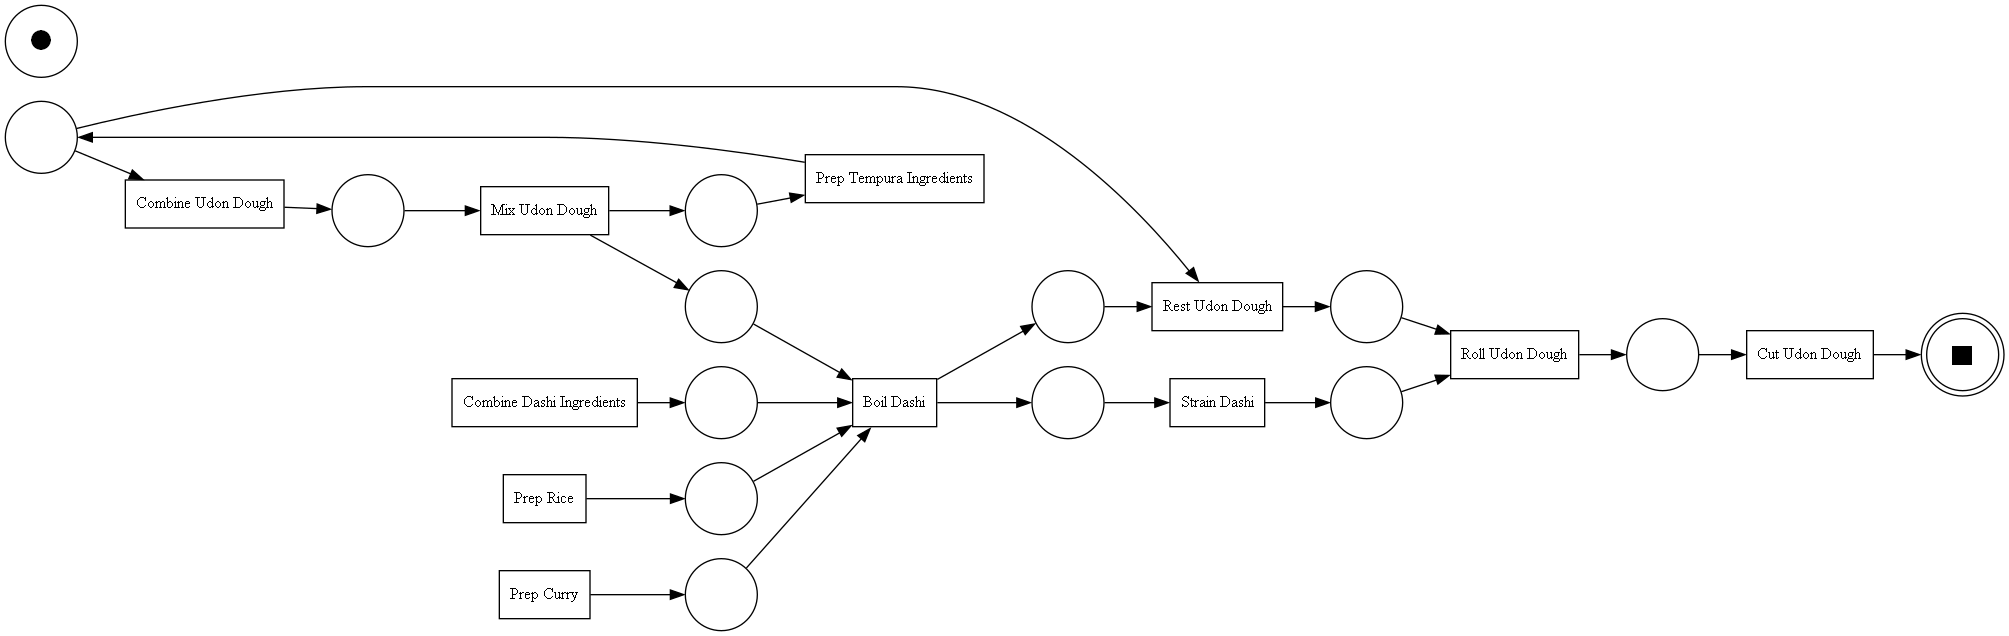

(0, 0, 0.0)

In [4]:
discover_and_analyze_model(log=ingredient_prep_B_log, algorithm='alpha')

aligning log, completed variants :: 100%|█████████████████████████████████████████████| 64/64 [00:00<00:00, 315.07it/s]


Fitness Alignments: 0.5333262223170357


computing precision with alignments, completed variants :: 100%|███████████████████| 430/430 [00:00<00:00, 1124.23it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\algo\analysis\woflan\place_invariants\utility.py:151: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")


Precision Alignments: 0.9995424126294115
Input is ok.
Petri Net is a workflow net.
The following places are not covered by an s-component: [intplace_Prep Rice, intplace_Prep Tempura Ingredients, intplace_Strain Dashi, pre_Combine Udon Dough, pre_Cut Udon Dough, pre_Mix Udon Dough, pre_Prep Curry, pre_Prep Tempura Ingredients, pre_Rest Udon Dough, pre_Roll Udon Dough, pre_Strain Dashi, sink0, source0, splace_in_Boil Dashi_Mix Udon Dough_0, splace_in_Boil Dashi_Prep Curry_0, splace_in_Boil Dashi_Prep Rice_0, splace_in_Prep Tempura Ingredients_Combine Dashi Ingredients_0, splace_in_Prep Tempura Ingredients_Mix Udon Dough_0, splace_in_Prep Tempura Ingredients_Prep Curry_0, splace_in_Prep Tempura Ingredients_Prep Rice_0].
Model is not sound!


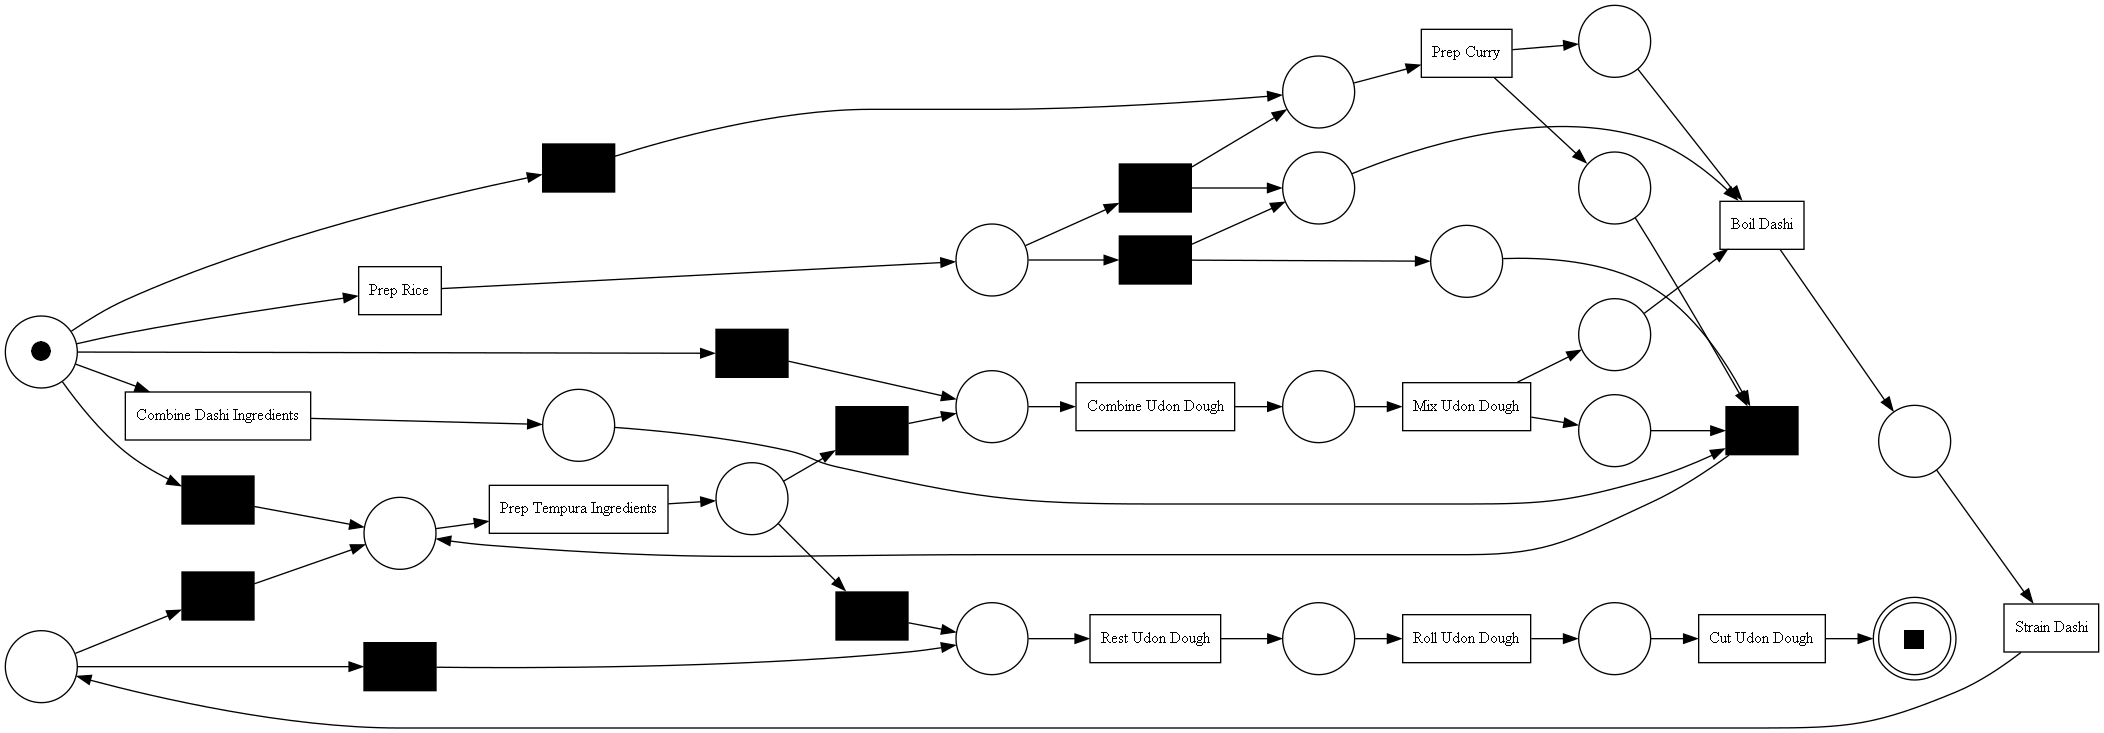

(0.53, 1.0, 0.0)

In [5]:
discover_and_analyze_model(log=ingredient_prep_B_log, algorithm='heuristics')

aligning log, completed variants :: 100%|█████████████████████████████████████████████| 64/64 [00:00<00:00, 332.43it/s]


Fitness Alignments: 0.9999954545661156


computing precision with alignments, completed variants :: 100%|████████████████████| 430/430 [00:00<00:00, 869.84it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\algo\analysis\woflan\place_invariants\utility.py:151: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")


Precision Alignments: 0.7554676753782669
Input is ok.
Petri Net is a workflow net.
Every place is covered by s-components.
There are no dead tasks.
All tasks are live.
Model is sound.


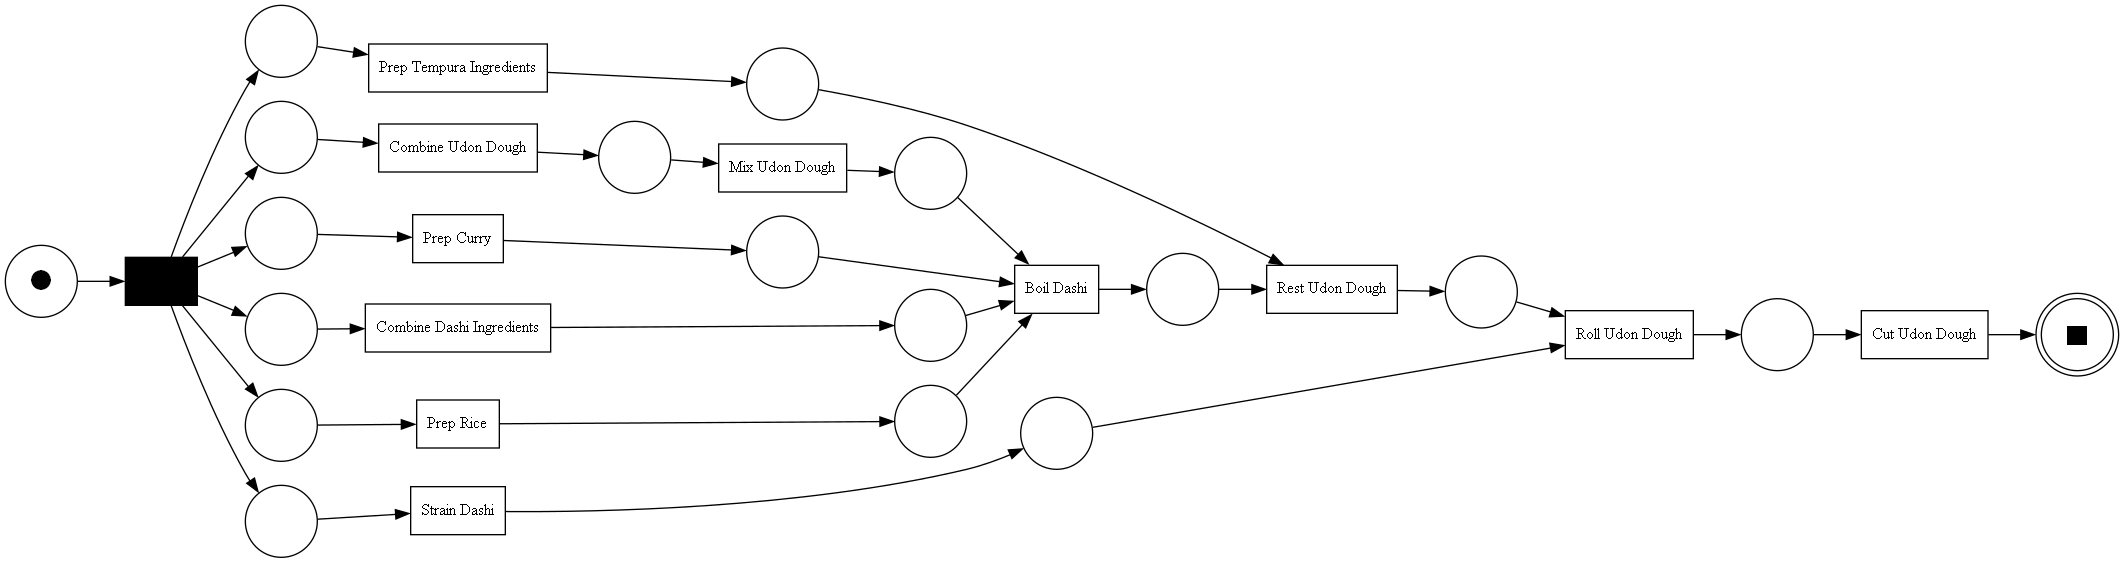

(1.0, 0.76, 0.0)

In [6]:
discover_and_analyze_model(log=ingredient_prep_B_log, algorithm='inductive')

discovering Petri net using ILP miner, completed causal relations :: 100%|████████████| 19/19 [00:00<00:00, 269.06it/s]
aligning log, completed variants :: 100%|█████████████████████████████████████████████| 64/64 [00:00<00:00, 347.94it/s]


Fitness Alignments: 0.9999954545661156


computing precision with alignments, completed variants :: 100%|████████████████████| 430/430 [00:00<00:00, 725.03it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\algo\analysis\woflan\place_invariants\utility.py:151: UserWarning: solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.
  warnings.warn("solution from scipy may be unstable. Please install PuLP (pip install pulp) for fully reliable results.")


Precision Alignments: 0.9421072944808954
Input is ok.
Petri Net is a workflow net.
The following places are not covered by an s-component: [17].
Model is not sound!


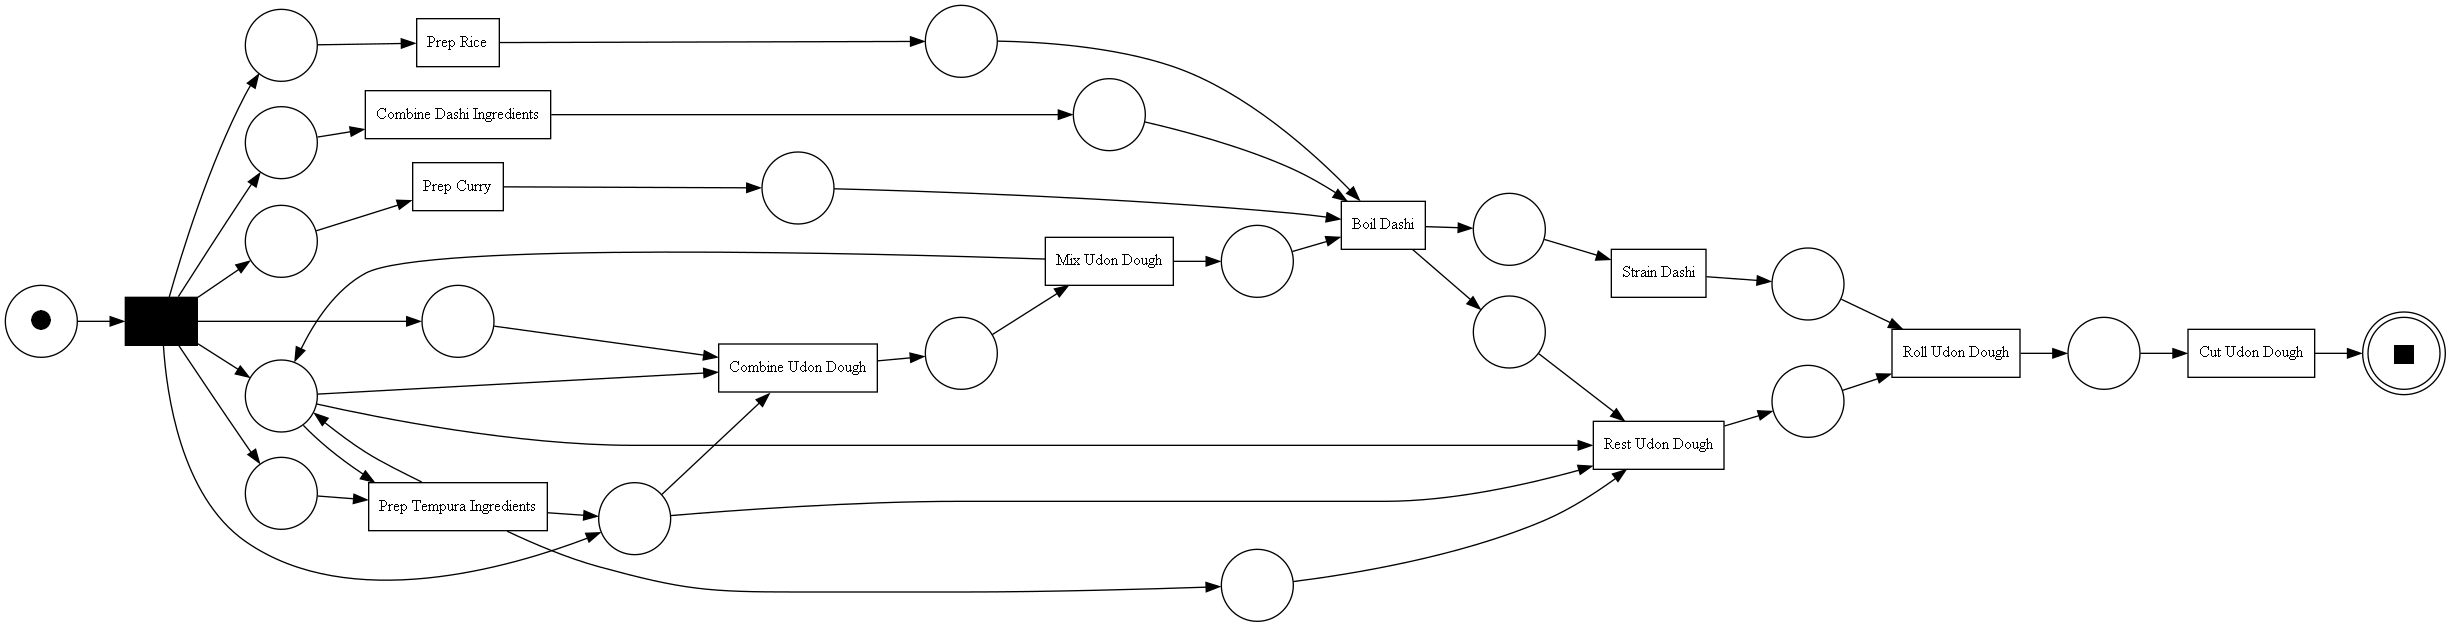

(1.0, 0.94, 0.0)

In [7]:
discover_and_analyze_model(log=ingredient_prep_B_log, algorithm='ilp')

In [9]:
ingredients_prep_B_event_log = pm4py.convert_to_event_log(ingredient_prep_B_log)

D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


### Part (a.iii)

Here we are ensuring that a trace does not appear in the log, but the behavior is possible according to the model discovered by the **Inductive Miner**. According to the model, we can perform the activity **Mix Udon Dough** before the activity **Combine Udon Dough**, which is not reasonable. However, there's no trace in the log that depicts this behavior.

In [10]:
# Check if there's any sign of mixing udon dough before combining udon dough
for trace in ingredients_prep_B_event_log:
    combine_index = 0
    mix_index = 0
    for index, event in enumerate(trace):
        if event['concept:name'] == 'Combine Udon Dough':
            combine_index = index
        elif event['concept:name'] == 'Mix Udon Dough':
            mix_index = index
    if mix_index < combine_index:
        print('Mixing before combining!')
    

### Part (c.i)

In [11]:
ingredient_prep_A_log = pm4py.read_xes(os.path.join("data", "input-logs", "ingredient_prep_A.xes"))

parsing log, completed traces :: 100%|█████████████████████████████████████████████| 314/314 [00:00<00:00, 1223.46it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure par

In [12]:
ingredient_prep_A_log

,concept:name,time:timestamp,org:resource,lifecycle:transition,duration_in_s,case:concept:name,case:case_type
0,Prep Curry,2023-04-01 06:00:00+00:00,Oku-san,start,3720.0,prep_0,prep
1,Combine Udon Dough,2023-04-01 06:00:00+00:00,Tenchou-san,start,480.0,prep_0,prep
2,Combine Dashi Ingredients,2023-04-01 06:00:00+00:00,Tenchou-san,start,1440.0,prep_0,prep
3,Combine Udon Dough,2023-04-01 06:08:00+00:00,Tenchou-san,complete,NaN,prep_0,prep
4,Prep Rice,2023-04-01 06:08:00+00:00,Tenchou-san,start,1680.0,prep_0,prep
...,...,...,...,...,...,...,...
6903,Rest Udon Dough,2024-03-31 09:19:00+00:00,Kitchen,complete,NaN,prep_626,prep
6904,Roll Udon Dough,2024-03-31 09:19:00+00:00,Deshi-san A,start,1980.0,prep_626,prep
6905,Roll Udon Dough,2024-03-31 09:52:00+00:00,Deshi-san A,complete,NaN,prep_626,prep
6906,Cut Udon Dough,2024-03-31 09:52:00+00:00,Deshi-san A,start,540.0,prep_626,prep


In [13]:
ingredient_prep_A_log["activity_lifecycle"] = ingredient_prep_A_log["concept:name"] + "+" + ingredient_prep_A_log["lifecycle:transition"]

In [14]:
ingredient_prep_A_log

,concept:name,time:timestamp,org:resource,lifecycle:transition,duration_in_s,case:concept:name,case:case_type,activity_lifecycle
0,Prep Curry,2023-04-01 06:00:00+00:00,Oku-san,start,3720.0,prep_0,prep,Prep Curry+start
1,Combine Udon Dough,2023-04-01 06:00:00+00:00,Tenchou-san,start,480.0,prep_0,prep,Combine Udon Dough+start
2,Combine Dashi Ingredients,2023-04-01 06:00:00+00:00,Tenchou-san,start,1440.0,prep_0,prep,Combine Dashi Ingredients+start
3,Combine Udon Dough,2023-04-01 06:08:00+00:00,Tenchou-san,complete,NaN,prep_0,prep,Combine Udon Dough+complete
4,Prep Rice,2023-04-01 06:08:00+00:00,Tenchou-san,start,1680.0,prep_0,prep,Prep Rice+start
...,...,...,...,...,...,...,...,...
6903,Rest Udon Dough,2024-03-31 09:19:00+00:00,Kitchen,complete,NaN,prep_626,prep,Rest Udon Dough+complete
6904,Roll Udon Dough,2024-03-31 09:19:00+00:00,Deshi-san A,start,1980.0,prep_626,prep,Roll Udon Dough+start
6905,Roll Udon Dough,2024-03-31 09:52:00+00:00,Deshi-san A,complete,NaN,prep_626,prep,Roll Udon Dough+complete
6906,Cut Udon Dough,2024-03-31 09:52:00+00:00,Deshi-san A,start,540.0,prep_626,prep,Cut Udon Dough+start


### Part (c.ii)

In [26]:
def run_parameterized_inductive_miner(log, noise_thresholds, activity_key='concept:name', store_result=False, prefix='default', filename='default.csv'):
    result = {
        'noise_threshold': [],
        'fitness': [],
        'precision': [],
        'f1_score': []
    }

    for threshold in noise_thresholds:
        print(f"Noise Threshold: {threshold}")
        fitness, precision, f1_score = discover_and_analyze_model(log=log, activity_key=activity_key, algorithm='inductive', noise_threshold=threshold, soundness_check=False, calc_f1_score=True, save_img=True, filename=f"{prefix}_Inductive_NT_{threshold}.png")
        result['noise_threshold'].append(threshold)
        result['fitness'].append(fitness)    
        result['precision'].append(precision)    
        result['f1_score'].append(f1_score)

    result_df = pd.DataFrame(result)
    result_df.to_csv(os.path.join('./output_data', f"{prefix}_{filename}"))

Noise Threshold: 0


aligning log, completed variants :: 100%|███████████████████████████████████████████| 271/271 [00:02<00:00, 102.72it/s]


Fitness Alignments: 0.9999954545661156


computing precision with alignments, completed variants :: 100%|██████████████████| 4311/4311 [00:15<00:00, 279.05it/s]


Precision Alignments: 0.33528865274909203
F1-Score: 0.5021959399948744


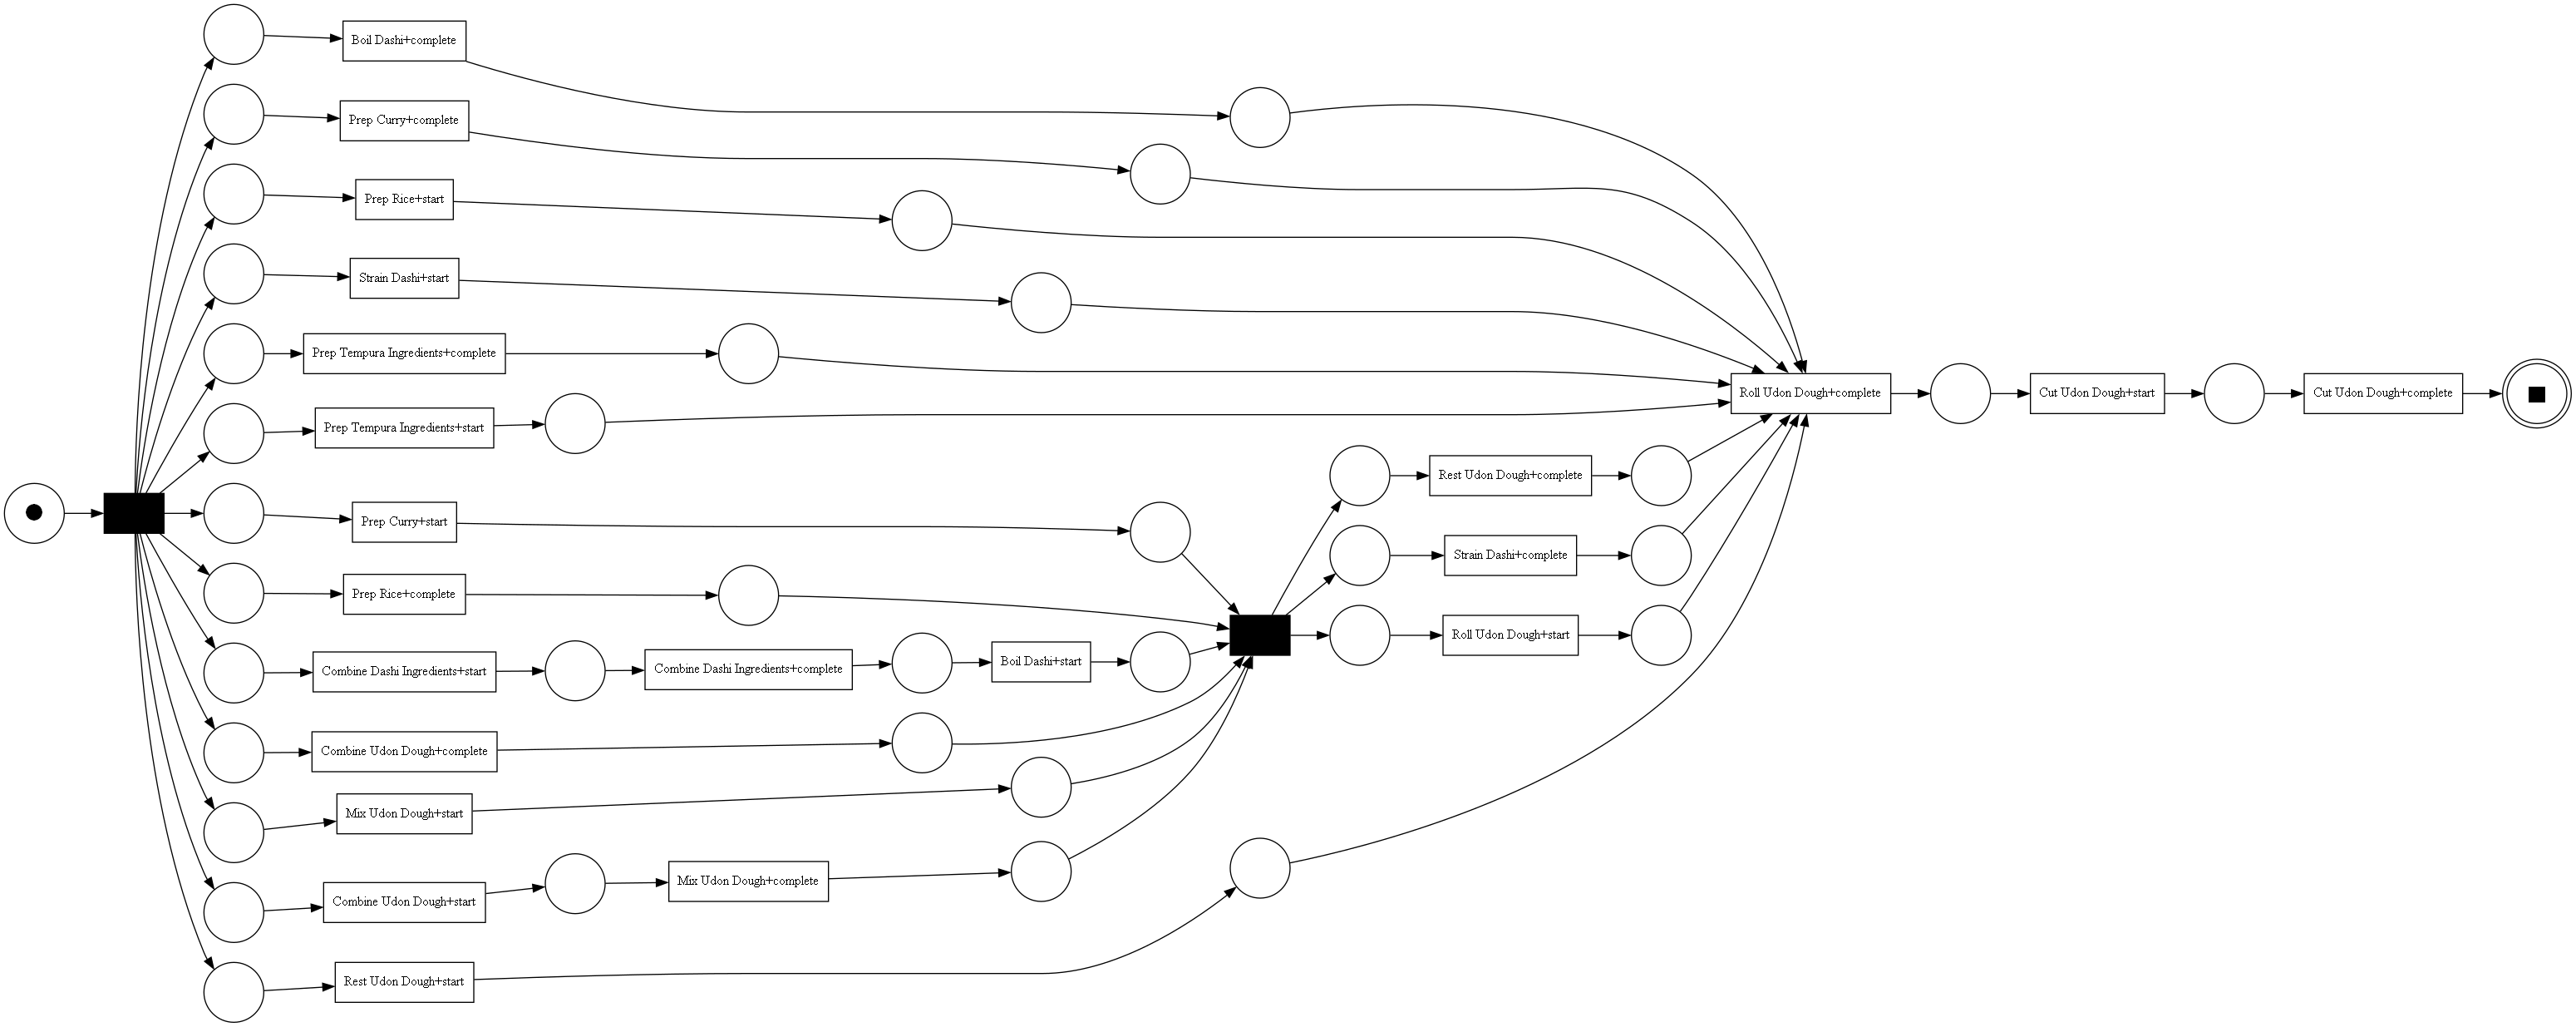

Noise Threshold: 0.25


aligning log, completed variants :: 100%|████████████████████████████████████████████| 271/271 [01:11<00:00,  3.79it/s]


Fitness Alignments: 0.9436120274781403


computing precision with alignments, completed variants :: 100%|██████████████████| 4311/4311 [00:20<00:00, 208.84it/s]


Precision Alignments: 0.6761593818909079
F1-Score: 0.7878051452864937


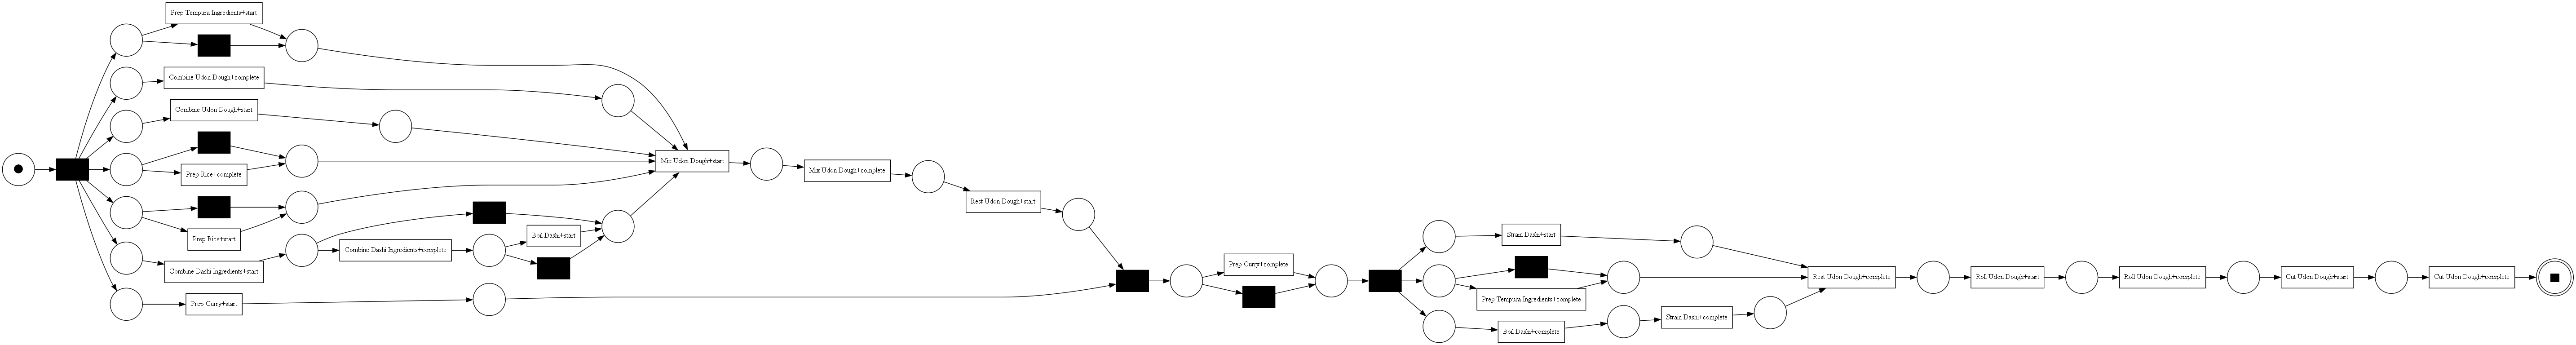

Noise Threshold: 0.5


aligning log, completed variants :: 100%|████████████████████████████████████████████| 271/271 [00:24<00:00, 10.90it/s]


Fitness Alignments: 0.8837914455855186


computing precision with alignments, completed variants :: 100%|██████████████████| 4311/4311 [00:11<00:00, 359.55it/s]


Precision Alignments: 0.6073772949918363
F1-Score: 0.7199652768322105


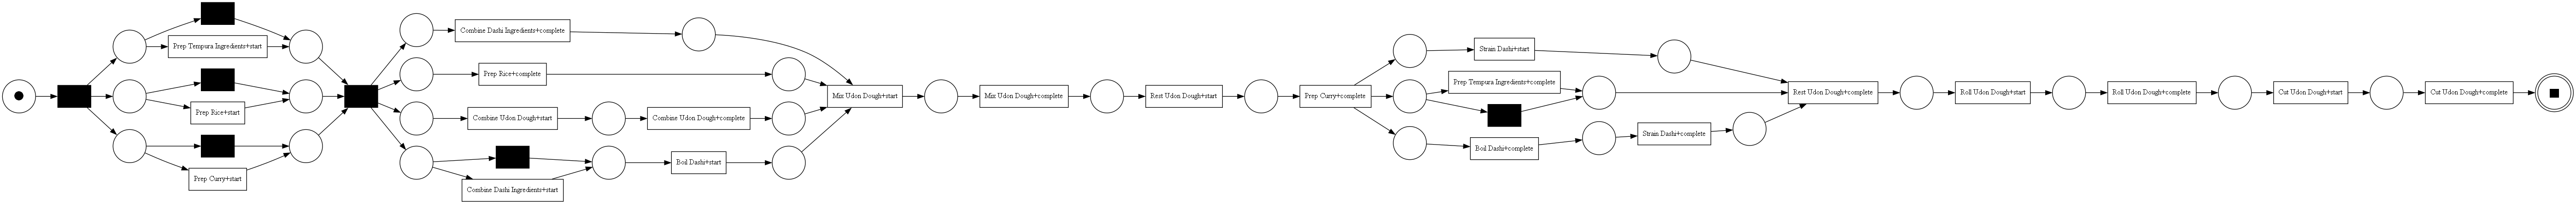

Noise Threshold: 0.75


aligning log, completed variants :: 100%|████████████████████████████████████████████| 271/271 [00:06<00:00, 41.01it/s]


Fitness Alignments: 0.7737405906195716


computing precision with alignments, completed variants :: 100%|██████████████████| 4311/4311 [00:07<00:00, 606.66it/s]


Precision Alignments: 0.9990048336650554
F1-Score: 0.8720604543020959


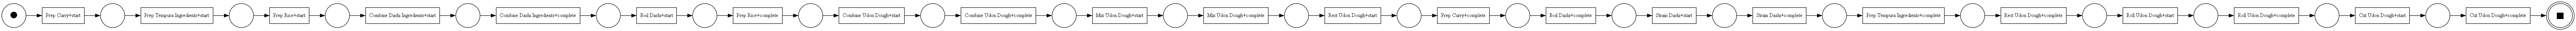

Noise Threshold: 1


aligning log, completed variants :: 100%|███████████████████████████████████████████| 271/271 [00:01<00:00, 231.85it/s]


Fitness Alignments: 0.28000287998848006


computing precision with alignments, completed variants :: 100%|█████████████████| 4311/4311 [00:04<00:00, 1057.93it/s]


Precision Alignments: 0.4967282663406918
F1-Score: 0.3581299547582075


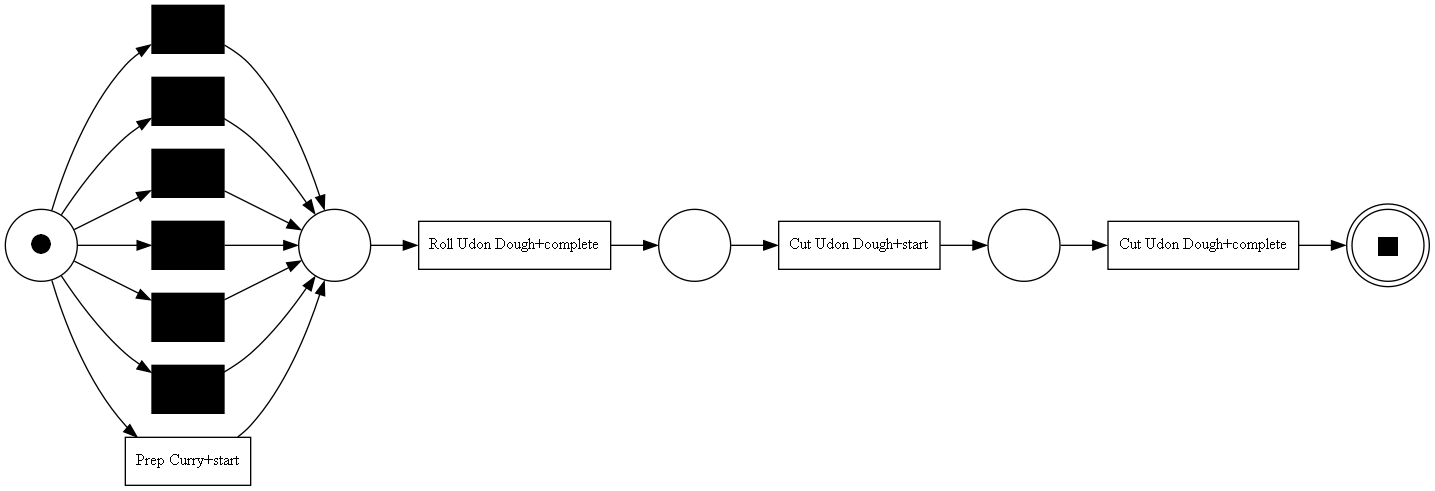

In [16]:
noise_thresholds = [0, 0.25, 0.5, 0.75, 1]
run_parameterized_inductive_miner(ingredient_prep_A_log, noise_thresholds=noise_thresholds, activity_key='activity_lifecycle', store_result=False, prefix='Ing_A', filename='performance.csv')

## **Question 4: Conformance Checking**

### Part (a.i)

In [ ]:
customer_perspective_log = pm4py.read_xes('./data/input-logs/customer_perspective.xes')

In [23]:
customer_perspective_log

,concept:name,time:timestamp,lifecycle:transition,org:resource,combined_lifecycle,case:concept:name,case:case_type,case:customer_group_id,case:customer_count,duration_in_s,order_no,global_order_id,dish,amount
0,Customer Group Enters,2023-04-01 09:20:00+00:00,schedule,n/a,Customer Group Enters+schedule,customers_0,customers,regular_0,1,NaN,NaN,NaN,NaN,NaN
1,Customer Group Enters,2023-04-01 09:30:00+00:00,start,Restaurant Tables,Customer Group Enters+start,customers_0,customers,regular_0,1,60.0,NaN,NaN,NaN,NaN
2,Customer Group Enters,2023-04-01 09:31:00+00:00,complete,Restaurant Tables,Customer Group Enters+complete,customers_0,customers,regular_0,1,NaN,NaN,NaN,NaN,NaN
3,Customer Group Occupies Table,2023-04-01 09:31:00+00:00,start,Restaurant Tables,Customer Group Occupies Table+start,customers_0,customers,regular_0,1,NaN,NaN,NaN,NaN,NaN
4,Receive Order,2023-04-01 09:31:00+00:00,start,Baito-san B,Receive Order+start,customers_0,customers,regular_0,1,60.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368145,Customer Group Pays,2024-03-31 18:22:59.500000+00:00,start,Customer-san,Customer Group Pays+start,customers_13758,customers,regular_13758,3,60.0,NaN,NaN,NaN,NaN
368146,Customer Group Pays,2024-03-31 18:23:59.500000+00:00,complete,Customer-san,Customer Group Pays+complete,customers_13758,customers,regular_13758,3,NaN,NaN,NaN,NaN,2540.0
368147,Customer Group Occupies Table,2024-03-31 18:23:59.500000+00:00,complete,Restaurant Tables,Customer Group Occupies Table+complete,customers_13758,customers,regular_13758,3,NaN,NaN,NaN,NaN,NaN
368148,Customer Group Exits,2024-03-31 18:23:59.500000+00:00,start,Customer-san,Customer Group Exits+start,customers_13758,customers,regular_13758,3,0.0,NaN,NaN,NaN,NaN


Noise Threshold: 0


aligning log, completed variants :: 100%|████████████████████████████████████████████| 127/127 [00:06<00:00, 20.57it/s]


Fitness Alignments: 0.9999608265398322


computing precision with alignments, completed variants :: 100%|███████████████████| 2463/2463 [00:37<00:00, 64.91it/s]


Precision Alignments: 0.6454994217557268
F1-Score: 0.7845514785039033


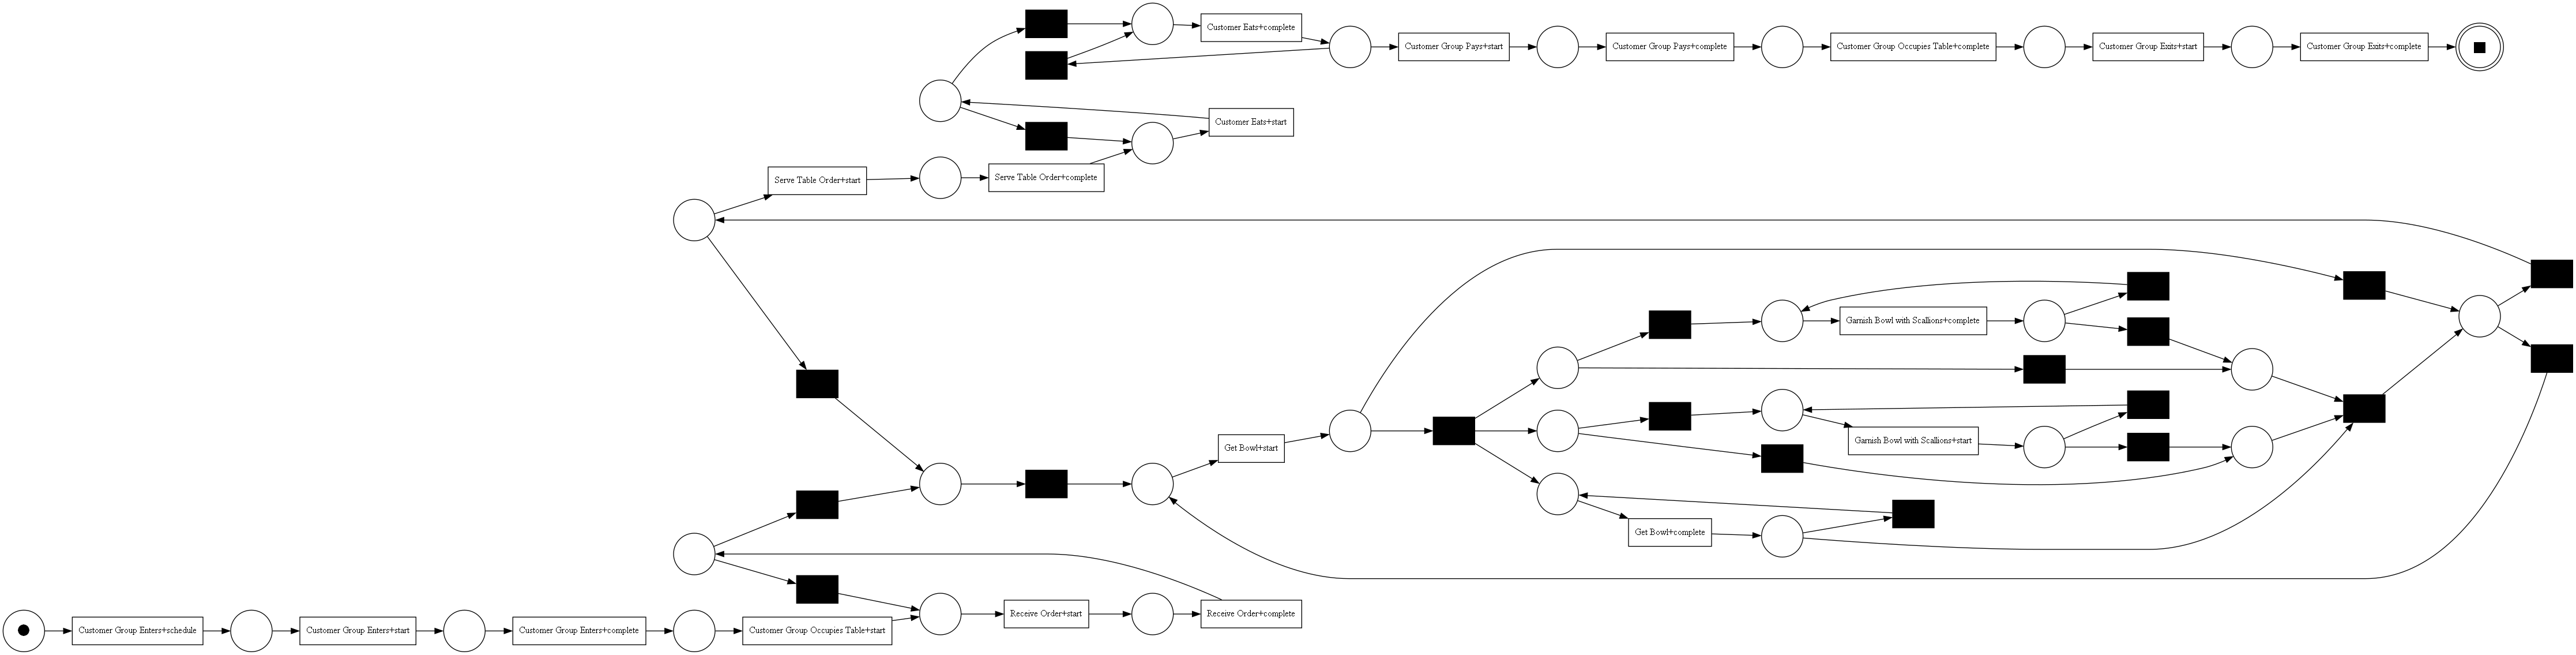

Noise Threshold: 0.5


aligning log, completed variants :: 100%|████████████████████████████████████████████| 127/127 [00:06<00:00, 18.55it/s]


Fitness Alignments: 0.9947233883019488


computing precision with alignments, completed variants :: 100%|██████████████████| 2463/2463 [00:09<00:00, 254.22it/s]


Precision Alignments: 0.8788126529130809
F1-Score: 0.9331824748045969


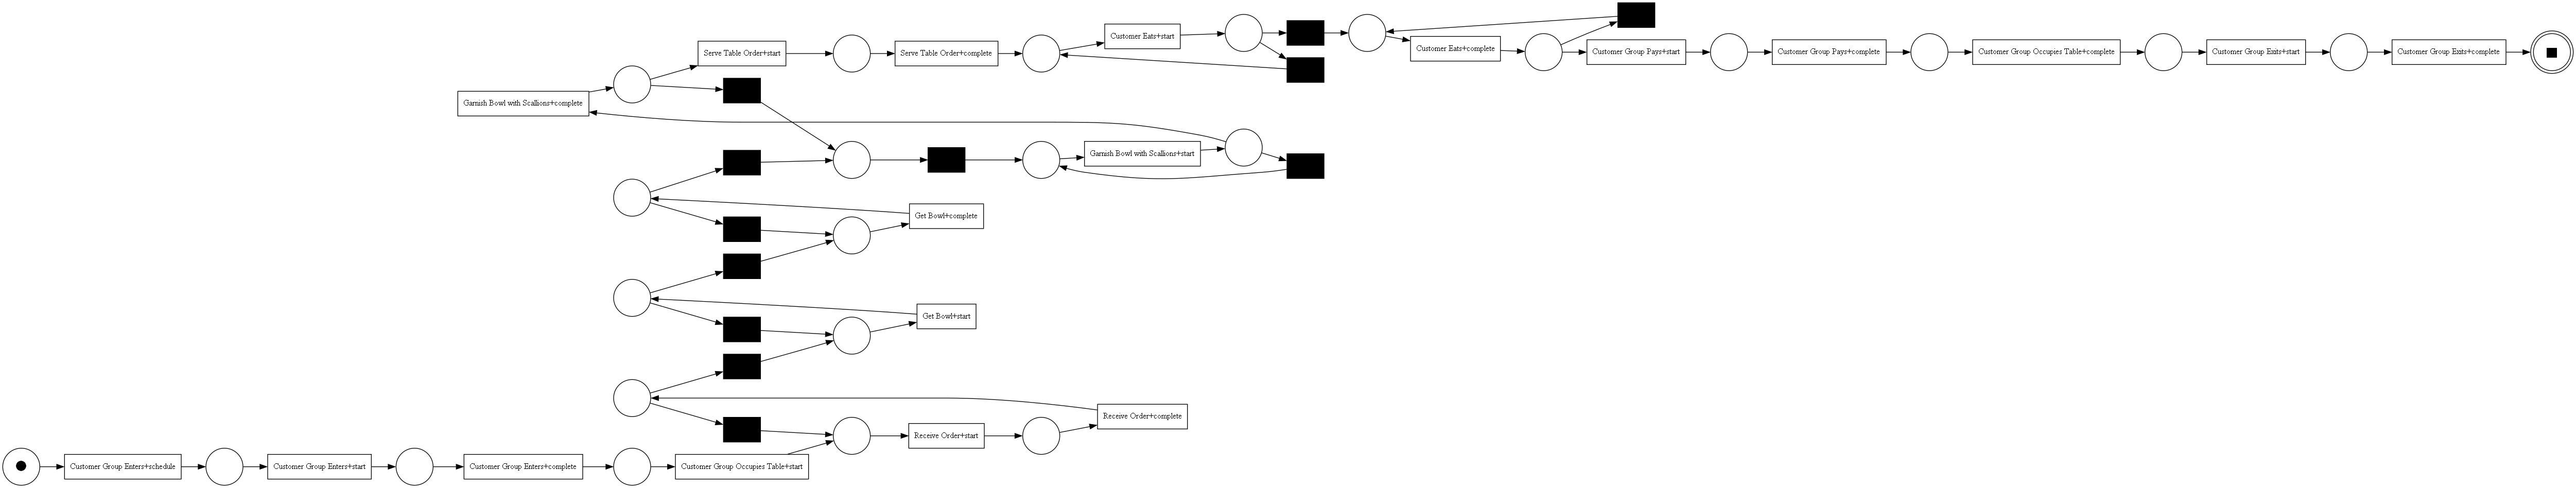

Noise Threshold: 1


aligning log, completed variants :: 100%|████████████████████████████████████████████| 127/127 [00:03<00:00, 40.17it/s]


Fitness Alignments: 0.8174021636852267


computing precision with alignments, completed variants :: 100%|██████████████████| 2463/2463 [00:06<00:00, 358.09it/s]


Precision Alignments: 0.9026119745757892
F1-Score: 0.8578964144241036


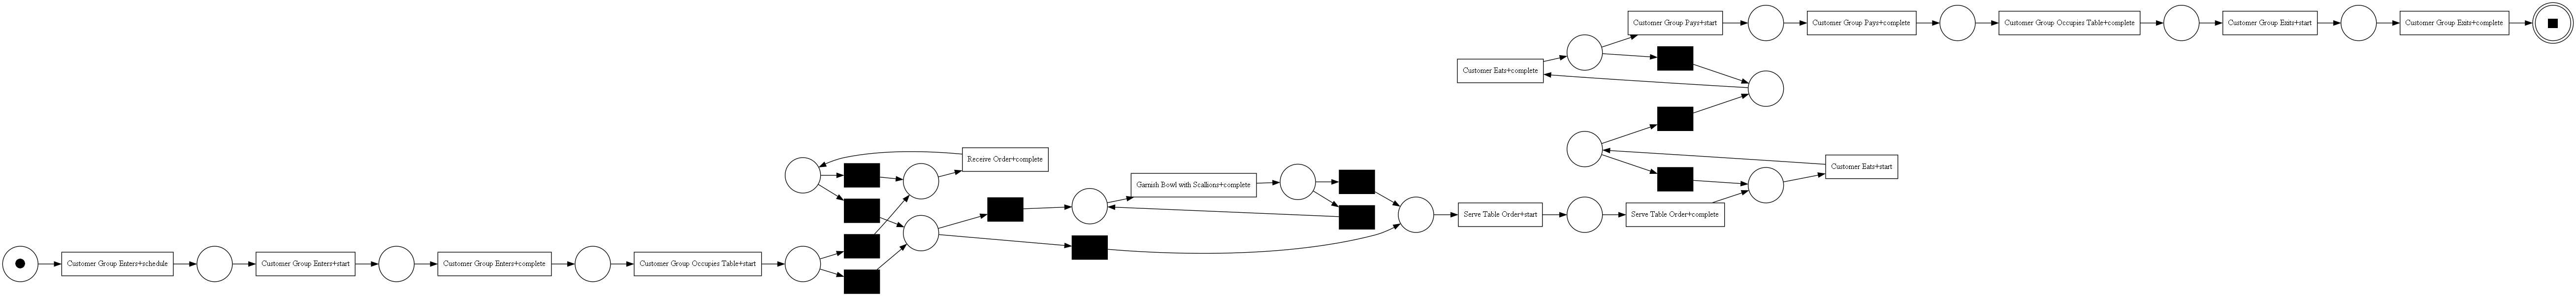

In [27]:
noise_thresholds = [0, 0.5, 1]
run_parameterized_inductive_miner(customer_perspective_log, noise_thresholds=noise_thresholds, activity_key='combined_lifecycle', store_result=False, prefix='CP', filename='performance.csv')

In [33]:
def load_and_analyze_model(model_filename):
    net, initial_marking, final_marking = pm4py.read_pnml(os.path.join("data", "input-models", model_filename))
    pm4py.view_petri_net(net, initial_marking, final_marking)
    analyze_model(customer_perspective_log, net, initial_marking, final_marking, activity_key='combined_lifecycle', soundness_check=True, calc_f1_score=True)
    


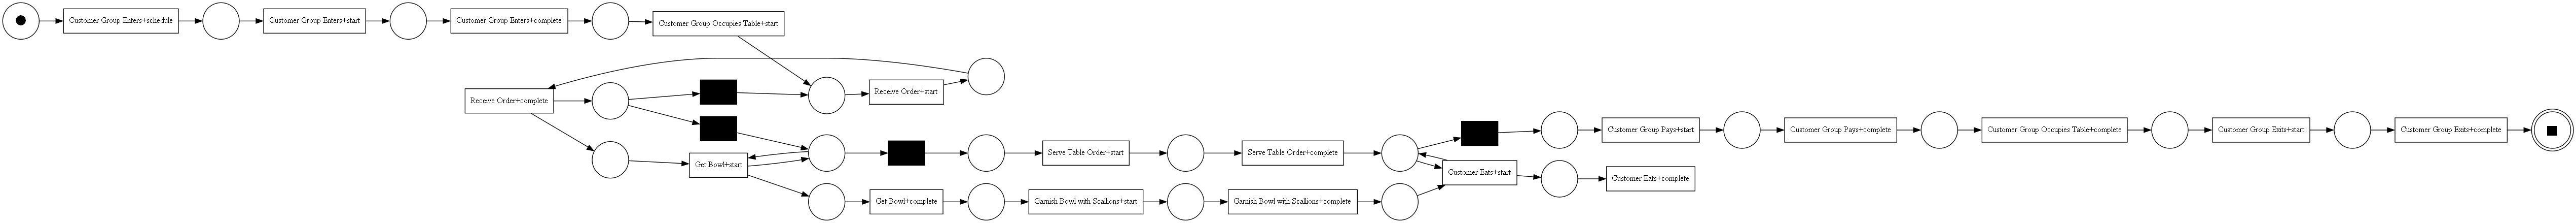

aligning log, completed variants :: 100%|████████████████████████████████████████████| 127/127 [00:01<00:00, 91.63it/s]


Fitness Alignments: 0.9999914950716899


computing precision with alignments, completed variants :: 100%|██████████████████| 2463/2463 [00:14<00:00, 167.52it/s]


Precision Alignments: 0.8144157505809855
Input is ok.
Petri Net is a not a worflow net.
Model is not sound!
F1-Score: 0.8977133727664921


In [36]:
load_and_analyze_model("customer_perspective.pnml")
# Not Safe
# No Proper Completion
# No Option to Complete
# Absence of dead parts is satisfied

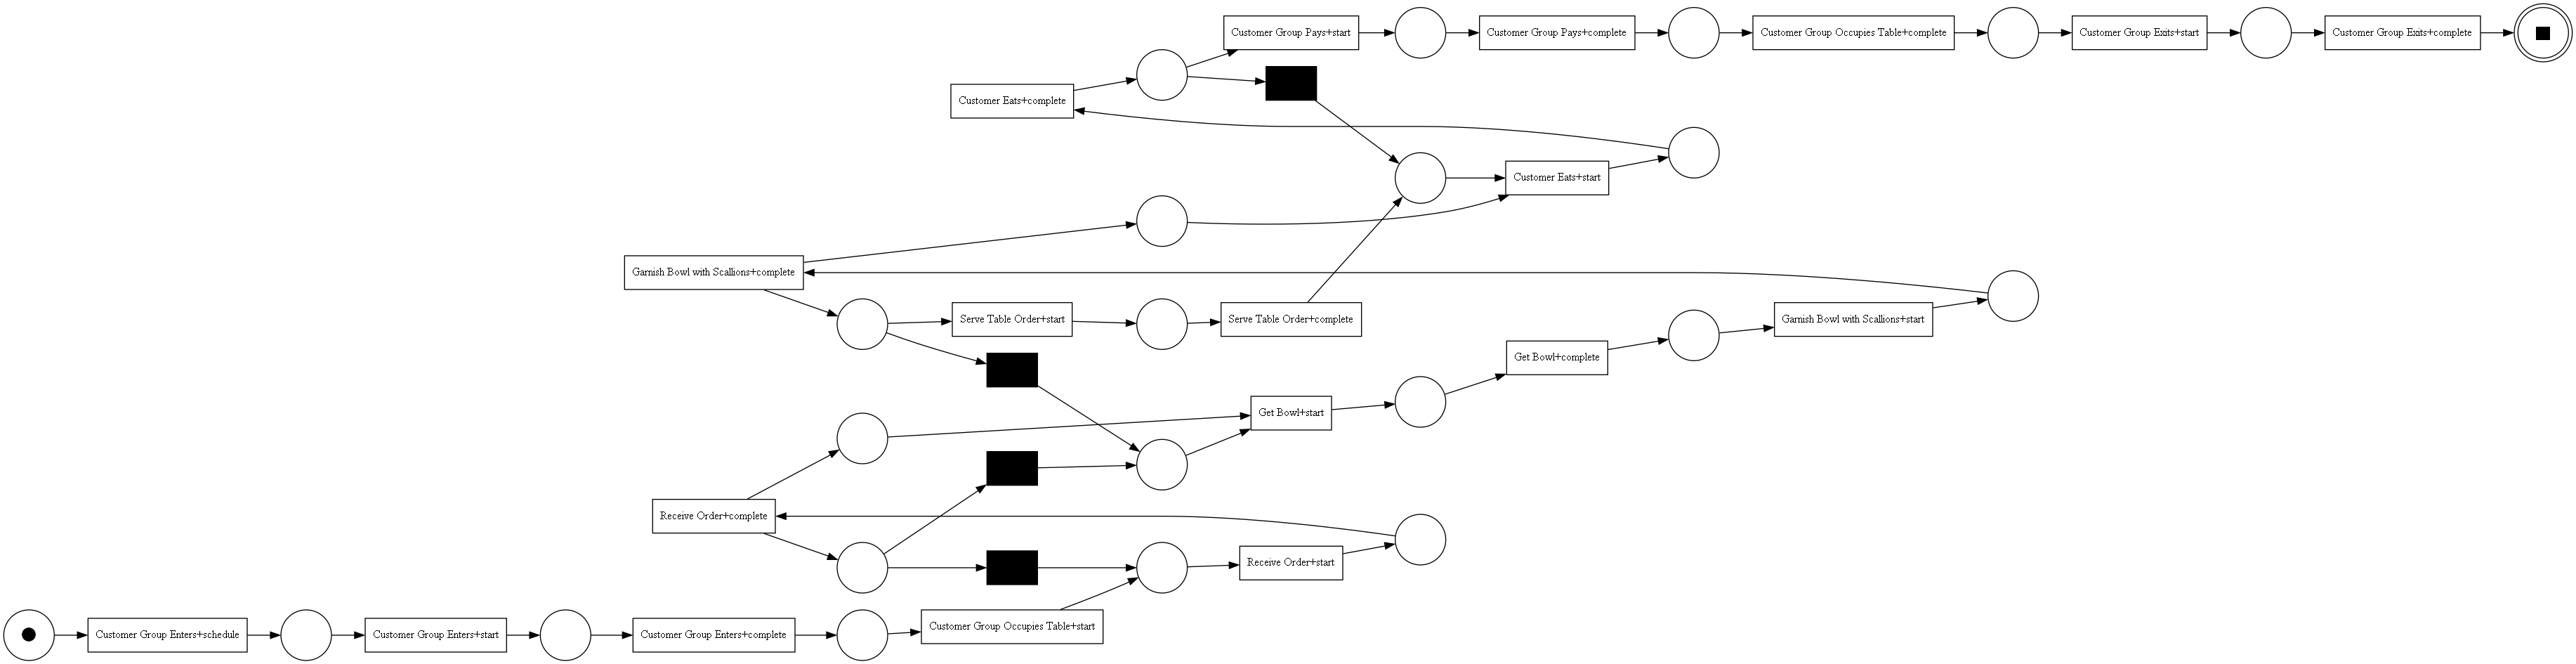

aligning log, completed variants :: 100%|████████████████████████████████████████████| 127/127 [01:27<00:00,  1.45it/s]


Fitness Alignments: 0.8956236721720989


computing precision with alignments, completed variants :: 100%|██████████████████| 2463/2463 [00:08<00:00, 278.14it/s]


Precision Alignments: 0.9994425974300113
Input is ok.
Petri Net is a workflow net.
The following places are not covered by an s-component: [n10, n8].
Model is not sound!
F1-Score: 0.9446893373532828


In [35]:
load_and_analyze_model("customer_perspective_seq.pnml")
# Not Safe
# No Proper Completion
# No Option to Complete
# Absence of dead parts is satisfied

## **Question 5: Diving into some Details**

### Part (a.i)

In [2]:
dish_cooking_log = pm4py.read_xes('./data/input-logs/dish_cooking.xes')

D:\Projects\apm-assignment-1\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████████████████████████████████████████████████████████████████████████| 14842/14842 [00:27<00:00, 542.82it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, 

In [3]:
dish_cooking_log

,concept:name,time:timestamp,org:resource,lifecycle:transition,duration_in_s,case:concept:name,case:case_type,case:customer_group_id,case:customer_count,order_no,global_order_id,dish
0,Receive Order,2023-04-01 11:31:00+00:00,Baito-san B,start,60.0,customers_0,customers,regular_0,1,NaN,NaN,NaN
1,Receive Order,2023-04-01 11:32:00+00:00,Baito-san B,complete,NaN,customers_0,customers,regular_0,1,1.0,regular_0_1,?
2,Get Bowl,2023-04-01 11:32:30+00:00,Deshi-san B,start,14.0,customers_0,customers,regular_0,1,NaN,regular_0_1,NaN
3,Get Bowl,2023-04-01 11:32:44+00:00,Deshi-san B,complete,NaN,customers_0,customers,regular_0,1,NaN,regular_0_1,NaN
4,Add Udon to Pot,2023-04-01 11:32:44+00:00,Deshi-san A,start,19.0,customers_0,customers,regular_0,1,NaN,regular_0_1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
445553,Add Tempura to Bowl,2024-03-31 20:09:15+00:00,Deshi-san B,start,33.0,customers_13758,customers,regular_13758,3,NaN,regular_13758_2,NaN
445554,Garnish Bowl with Scallions,2024-03-31 20:09:40.166666+00:00,Oku-san,complete,NaN,customers_13758,customers,regular_13758,3,NaN,regular_13758_3,NaN
445555,Add Tempura to Bowl,2024-03-31 20:09:48+00:00,Deshi-san B,complete,NaN,customers_13758,customers,regular_13758,3,NaN,regular_13758_2,NaN
445556,Garnish Bowl with Scallions,2024-03-31 20:09:48+00:00,Tenchou-san,start,11.5,customers_13758,customers,regular_13758,3,NaN,regular_13758_2,NaN


In [4]:
# Dict of trace and count
variants = pm4py.get_variants(dish_cooking_log)

### Part (a.ii)

In [5]:
trace_variants = list(variants.keys())

In [6]:
unique_variant_sets = []

def check_set_equality(first_set, second_set):
    return len(first_set) == len(second_set) and all([item in second_set for item in first_set])

for variant in trace_variants:
    curr_variant_set = set(variant)
    variant_set_exists = any([check_set_equality(curr_variant_set, variant_set) for variant_set in unique_variant_sets])
    if not variant_set_exists:
        unique_variant_sets.append(curr_variant_set)

print(len(unique_variant_sets))

8


### Part (a.iii)

In [7]:
for var_set in unique_variant_sets:
    var_set_dish = [item for item in var_set if item.startswith('Add') and item.endswith('Bowl')]
    print(var_set_dish)
    

['Add Tempura to Bowl', 'Add Dashi to Bowl', 'Add Udon to Bowl']
['Add Udon to Bowl', 'Add Curry to Bowl']
['Add Rice to Bowl', 'Add Tempura to Bowl', 'Add Curry to Bowl']
['Add Rice to Bowl', 'Add Curry to Bowl']
['Add Rice to Bowl', 'Add Tempura to Bowl', 'Add Dashi to Bowl', 'Add Udon to Bowl', 'Add Curry to Bowl']
['Add Tempura to Bowl', 'Add Dashi to Bowl', 'Add Udon to Bowl', 'Add Curry to Bowl']
['Add Rice to Bowl', 'Add Udon to Bowl', 'Add Curry to Bowl']
['Add Rice to Bowl', 'Add Tempura to Bowl', 'Add Udon to Bowl', 'Add Curry to Bowl']


In [10]:
random_variant_set = unique_variant_sets[2]

# Find a case belonging to this variant
case_events = dish_cooking_log.groupby('case:concept:name')['concept:name'].apply(list).reset_index(name='concept:name')
case_with_same_variant = None
for index, case_event in case_events.iterrows():
    if check_set_equality(case_event['concept:name'], random_variant_set):
        case_with_same_variant = case_event
        break

print(case_event['concept:name'])

['Receive Order', 'Receive Order', 'Receive Order', 'Receive Order', 'Get Bowl', 'Get Bowl', 'Get Bowl', 'Add Udon to Pot', 'Add Curry to Bowl', 'Get Bowl', 'Add Rice to Bowl', 'Add Curry to Bowl', 'Add Udon to Pot', 'Add Rice to Bowl', 'Add Curry to Bowl', 'Add Curry to Bowl', 'Garnish Bowl with Scallions', 'Garnish Bowl with Scallions', 'Strain and Wash Udon', 'Strain and Wash Udon', 'Add Udon to Bowl', 'Add Udon to Bowl', 'Garnish Bowl with Scallions', 'Garnish Bowl with Scallions']


### Part (a.iv)

### Part (b.i)

In [11]:
customer_perspective_log = pm4py.read_xes('./data/input-logs/customer_perspective.xes')

parsing log, completed traces :: 100%|██████████████████████████████████████████████████████████████████████████████| 14842/14842 [00:26<00:00, 566.19it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falli

In [12]:
data = customer_perspective_log[customer_perspective_log['combined_lifecycle'] == 'Customer Group Pays+complete']
data

,concept:name,time:timestamp,lifecycle:transition,org:resource,combined_lifecycle,case:concept:name,case:case_type,case:customer_group_id,case:customer_count,duration_in_s,order_no,global_order_id,dish,amount
15,Customer Group Pays,2023-04-01 09:50:36.666000+00:00,complete,Customer-san,Customer Group Pays+complete,customers_0,customers,regular_0,1,NaN,NaN,NaN,NaN,770.0
50,Customer Group Pays,2023-04-01 10:13:10+00:00,complete,Customer-san,Customer Group Pays+complete,customers_1,customers,regular_1,3,NaN,NaN,NaN,NaN,2500.0
69,Customer Group Pays,2023-04-01 10:20:01.833000+00:00,complete,Customer-san,Customer Group Pays+complete,customers_2,customers,regular_2,1,NaN,NaN,NaN,NaN,770.0
104,Customer Group Pays,2023-04-01 10:30:59+00:00,complete,Customer-san,Customer Group Pays+complete,customers_3,customers,regular_3,3,NaN,NaN,NaN,NaN,2620.0
139,Customer Group Pays,2023-04-01 10:45:25+00:00,complete,Customer-san,Customer Group Pays+complete,customers_4,customers,regular_4,3,NaN,NaN,NaN,NaN,2620.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368038,Customer Group Pays,2024-03-31 17:25:08.500000+00:00,complete,Customer-san,Customer Group Pays+complete,customers_13754,customers,regular_13754,2,NaN,NaN,NaN,NaN,1770.0
368065,Customer Group Pays,2024-03-31 17:28:57.333000+00:00,complete,Customer-san,Customer Group Pays+complete,customers_13755,customers,regular_13755,2,NaN,NaN,NaN,NaN,1000.0
368092,Customer Group Pays,2024-03-31 17:52:43.500000+00:00,complete,Customer-san,Customer Group Pays+complete,customers_13756,customers,regular_13756,2,NaN,NaN,NaN,NaN,1770.0
368111,Customer Group Pays,2024-03-31 18:00:12+00:00,complete,Customer-san,Customer Group Pays+complete,customers_13757,customers,regular_13757,1,NaN,NaN,NaN,NaN,1000.0


In [26]:
# plot
total_revenue = data.amount.sum()
daily_avg_revenue = data.groupby([pd.Grouper(key='time:timestamp', freq='D')]).amount.mean()
daily_avg_revenue_agg = data.groupby([pd.Grouper(key='time:timestamp', freq='D')]).amount.sum().mean()
avg_per_case_revenue = data.groupby('case:concept:name').amount.mean().reset_index()
avg_per_case_revenue_agg = data.groupby('case:concept:name').amount.sum().mean()
avg_per_case_revenue

,case:concept:name,amount
0,customers peak_0,1000.0
1,customers peak_1,1000.0
2,customers peak_10,770.0
3,customers peak_100,850.0
4,customers peak_1000,1000.0
...,...,...
14837,customers_9995,2000.0
14838,customers_9996,1500.0
14839,customers_9997,2040.0
14840,customers_9998,770.0


### Part (b.ii)

In [27]:
daily_revenue = data.groupby(pd.Grouper(key='time:timestamp', freq='D')).amount.sum().reset_index()
daily_revenue.fillna(0, inplace=True)
daily_revenue

,time:timestamp,amount
0,2023-04-01 00:00:00+00:00,62300.0
1,2023-04-02 00:00:00+00:00,63930.0
2,2023-04-03 00:00:00+00:00,0.0
3,2023-04-04 00:00:00+00:00,93750.0
4,2023-04-05 00:00:00+00:00,73660.0
...,...,...
361,2024-03-27 00:00:00+00:00,88850.0
362,2024-03-28 00:00:00+00:00,94420.0
363,2024-03-29 00:00:00+00:00,85880.0
364,2024-03-30 00:00:00+00:00,56080.0


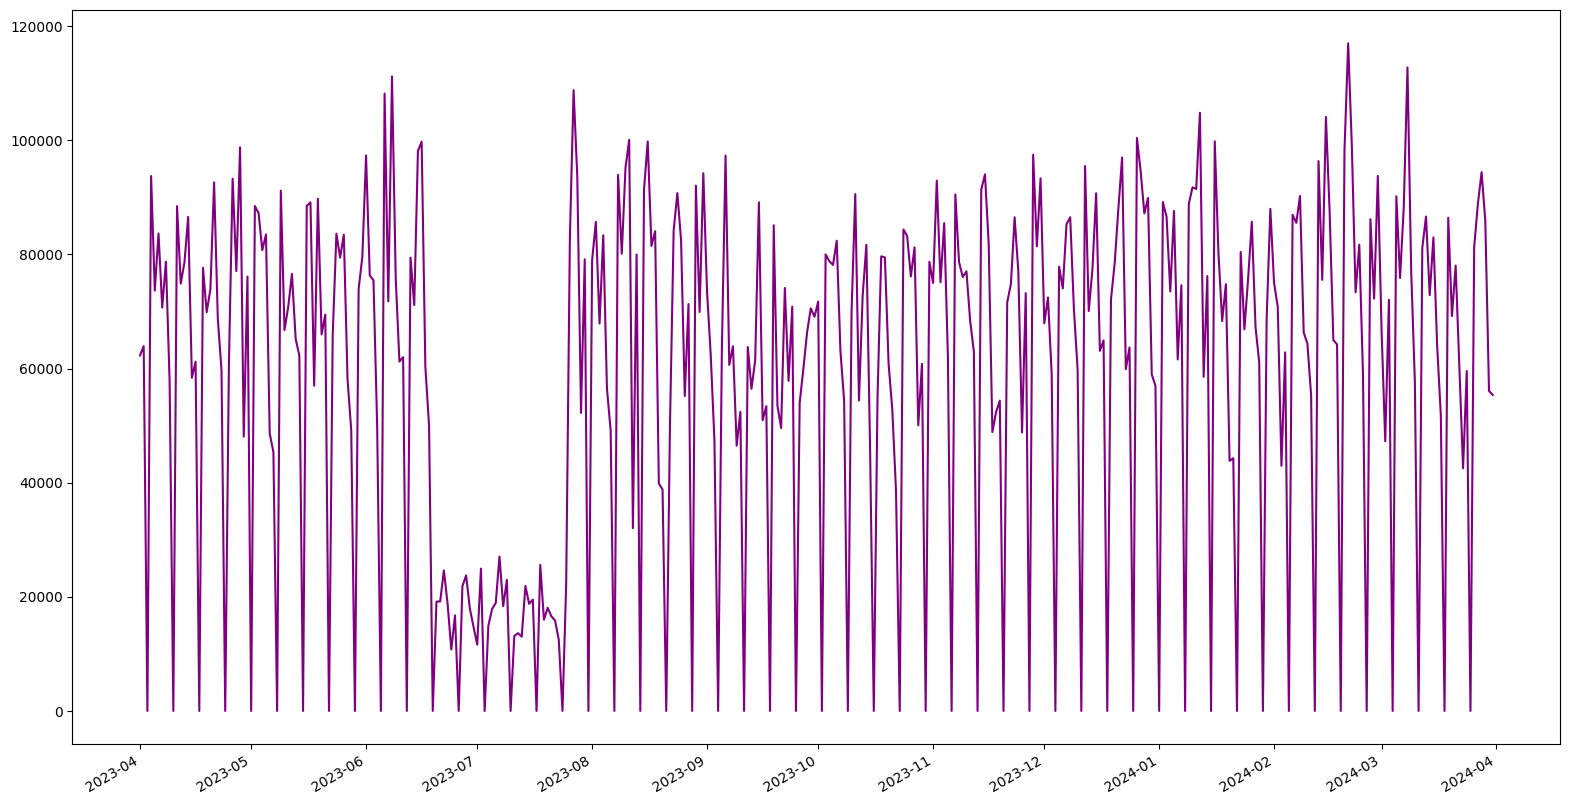

In [28]:
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(19.2, 10.8))

half_year_locator = mdates.MonthLocator()
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month
monthly_locator = mdates.MonthLocator()
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_minor_locator(monthly_locator)
ax.xaxis.set_major_formatter(year_month_formatter)

ax.plot(daily_revenue['time:timestamp'], daily_revenue['amount'], color='purple')

fig.autofmt_xdate()

### Part (c)

In [30]:
udonya_log = pm4py.read_xes('./data/input-logs/udonya.xes')

parsing log, completed traces :: 100%|██████████████████████████████████████████████████████████████████████████████| 16412/16412 [00:59<00:00, 276.31it/s]
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col], utc=True)
D:\Projects\apm-assignment-1\venv\Lib\site-packages\pm4py\objects\log\util\dataframe_utils.py:176: UserWarning: Could not infer format, so each element will be parsed individually, falli

In [31]:
udonya_log

,concept:name,time:timestamp,org:resource,lifecycle:transition,duration_in_s,case:concept:name,case:case_type,case:description,case:customer_group_id,case:customer_count,order_no,global_order_id,dish,amount
0,Prep Curry,2023-04-01 06:00:00+00:00,Oku-san,start,3720.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Combine Udon Dough,2023-04-01 06:00:00+00:00,Tenchou-san,start,480.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Combine Dashi Ingredients,2023-04-01 06:00:00+00:00,Tenchou-san,start,1440.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Combine Udon Dough,2023-04-01 06:08:00+00:00,Tenchou-san,complete,NaN,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prep Rice,2023-04-01 06:08:00+00:00,Tenchou-san,start,1680.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674481,Close for Business,2024-03-31 21:01:00+00:00,Oku-san,complete,NaN,closing_1254,store,close,NaN,NaN,NaN,NaN,NaN,NaN
674482,Cleanup Store,2024-03-31 21:01:00+00:00,Oku-san,start,1200.0,closing_1254,store,close,NaN,NaN,NaN,NaN,NaN,NaN
674483,Cleanup Store,2024-03-31 21:21:00+00:00,Oku-san,complete,NaN,closing_1254,store,close,NaN,NaN,NaN,NaN,NaN,NaN
674484,Close Store,2024-03-31 21:21:00+00:00,Oku-san,start,60.0,closing_1254,store,close,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
resource_start_events = udonya_log[(udonya_log['lifecycle:transition'] == 'start') & (udonya_log['org:resource'].str.contains('-san'))]
resource_start_events

,concept:name,time:timestamp,org:resource,lifecycle:transition,duration_in_s,case:concept:name,case:case_type,case:description,case:customer_group_id,case:customer_count,order_no,global_order_id,dish,amount
0,Prep Curry,2023-04-01 06:00:00+00:00,Oku-san,start,3720.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Combine Udon Dough,2023-04-01 06:00:00+00:00,Tenchou-san,start,480.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Combine Dashi Ingredients,2023-04-01 06:00:00+00:00,Tenchou-san,start,1440.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Prep Rice,2023-04-01 06:08:00+00:00,Tenchou-san,start,1680.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Prep Tempura Ingredients,2023-04-01 06:24:00+00:00,Tenchou-san,start,7500.0,prep_0,prep,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674475,Customer Group Pays,2024-03-31 20:22:59.500000+00:00,Customer-san,start,60.0,customers_13758,customers,NaN,regular_13758,3.0,NaN,NaN,NaN,NaN
674478,Customer Group Exits,2024-03-31 20:23:59.500000+00:00,Customer-san,start,0.0,customers_13758,customers,NaN,regular_13758,3.0,NaN,NaN,NaN,NaN
674480,Close for Business,2024-03-31 21:00:00+00:00,Oku-san,start,60.0,closing_1254,store,close,NaN,NaN,NaN,NaN,NaN,NaN
674482,Cleanup Store,2024-03-31 21:01:00+00:00,Oku-san,start,1200.0,closing_1254,store,close,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
weekly_durations = resource_start_events.groupby([pd.Grouper(key='time:timestamp', freq='W'), 'org:resource']).duration_in_s.sum().reset_index()
weekly_durations['duration_in_h'] = weekly_durations['duration_in_s'] / 3600
weekly_durations

,time:timestamp,org:resource,duration_in_s,duration_in_h
0,2023-04-02 00:00:00+00:00,Baito-san A,7500.000000,2.083333
1,2023-04-02 00:00:00+00:00,Baito-san B,9600.000000,2.666667
2,2023-04-02 00:00:00+00:00,Customer-san,91740.000000,25.483333
3,2023-04-02 00:00:00+00:00,Deshi-san A,7212.000000,2.003333
4,2023-04-02 00:00:00+00:00,Deshi-san B,6525.000000,1.812500
...,...,...,...,...
364,2024-03-31 00:00:00+00:00,Customer-san,337320.000000,93.700000
365,2024-03-31 00:00:00+00:00,Deshi-san A,30308.000000,8.418889
366,2024-03-31 00:00:00+00:00,Deshi-san B,23978.000000,6.660556
367,2024-03-31 00:00:00+00:00,Oku-san,66422.666581,18.450741


In [93]:
import matplotlib.dates as mdates
import math

unique_resources = weekly_durations['org:resource'].unique()

def plot_resource_utilization(num_columns=2):
    fig, axs = plt.subplots(math.ceil(len(unique_resources) / num_columns), num_columns, figsize=(19.2, 10.8), sharex=True, sharey=True)
    fig.tight_layout(pad=5.0)
    for index, resource in enumerate(unique_resources):
        ax_position = axs[index // num_columns, index % num_columns] if num_columns > 1 else axs[index]
        ax = sns.lineplot(data=weekly_durations, x='time:timestamp', y='duration_in_h', color='purple', ax=ax_position)
        locator = mdates.WeekdayLocator()
        ax.xaxis.set_major_locator(locator)
        ax.tick_params(axis='both', labelsize=8)
        ax.title.set_text(f"Utilization Plot for {resource}")
        # ax.set(ylim=(0, 100))
        fig.autofmt_xdate()

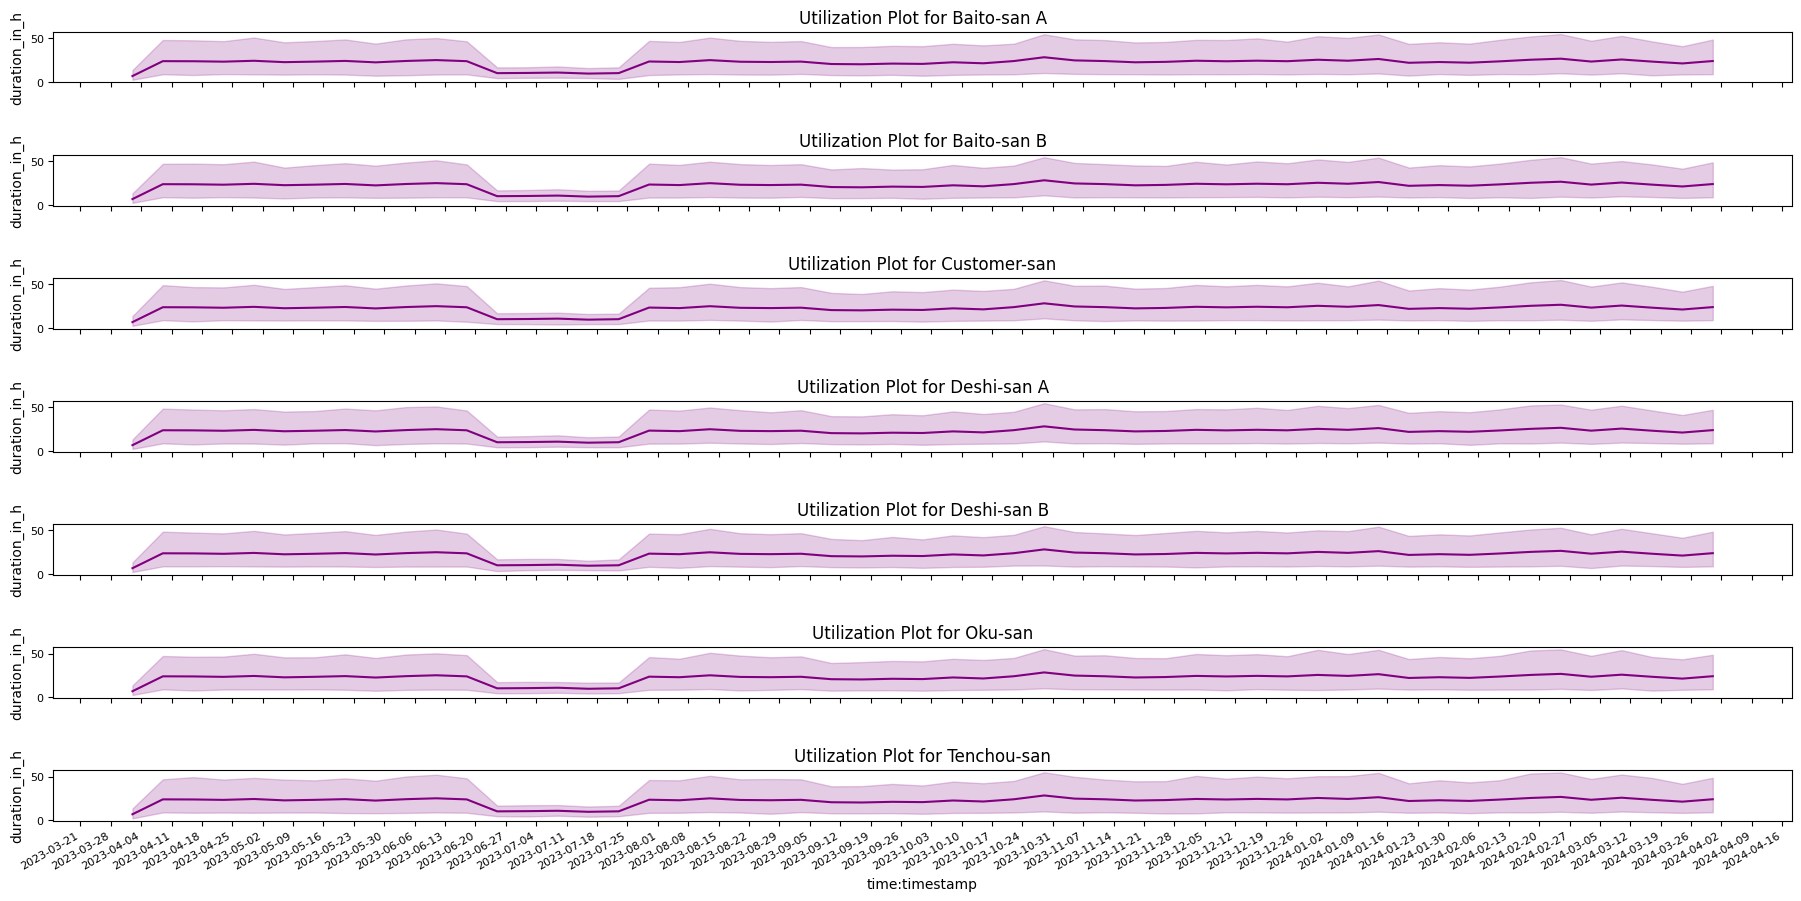

In [94]:
plot_resource_utilization(num_columns=1)

## **Question 6**

### Part (a)

In [118]:
sample_log = pm4py.parse_event_log_string(["a,b,c,d,b,c", "b,c,a,a,d,b,c", "b,c,d,b,c,a"])

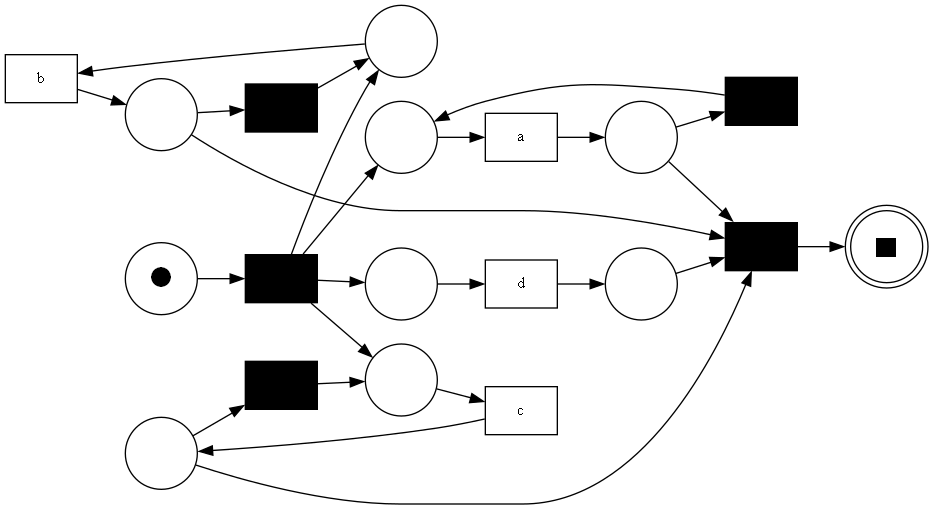

exporting log, completed traces :: 100%|█████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


In [120]:
net, im, fm = pm4py.discover_petri_net_inductive(sample_log)
pm4py.view_petri_net(net, im, fm)
pm4py.write_xes(sample_log, os.path.join("data", "submission-data", f"im-log-group85.xes"))